# Les installations

In [ ]:
!pip install cellpose
!pip install numpy
!pip install matplotlib
!pip install pandas
# !pip uninstall torch
!conda install pytorch cudatoolkit=10.2 -c pytorch
!pip install --no-deps cellpose --upgrade
!pip install scikit-image

# Les imports

In [1]:
import napari
import skimage
from skimage import io, filters, measure
from skimage.measure import regionprops_table
from skimage.filters import try_all_threshold, threshold_yen

from tkinter import *
from tkinter.filedialog import askdirectory
from tkinter.filedialog import askopenfilename

import os
import glob
import numpy as np
import cv2 as cv # to open and view your image
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import shutil

import cellpose
from cellpose import utils, io, plot, models

# Choose your path directory / Create a Result directory

In [2]:
root = Tk()
root.withdraw()

# =============================================================================
#Choose your path directory
# =============================================================================
path = askdirectory(title='Select Working Folder (where your image are)') # shows dialog box and return the path
print(path)
os.chdir(path)

pathResult = path+'/Results'
if not os.path.exists(pathResult):
    os.makedirs(pathResult)
print(pathResult)

# =============================================================================
#Display files in the folder
# =============================================================================

list = os.listdir(path)
for fichiers in list:
    print(fichiers)

C:/Users/silvinm/Desktop/Monica
C:/Users/silvinm/Desktop/Monica/Results
20210728_HeLaK_dThy_ICRF_DAPI_53BP1-488_LAP2b-568_siCtrl_14_19_MIP.tif
20210728_HeLaK_dThy_ICRF_DAPI_53BP1-488_LAP2b-568_siCtrl_18_8_MIP.tif
20210728_HeLaK_dThy_ICRF_DAPI_53BP1-488_LAP2b-568_siCtrl_24_8_MIP.tif
20210728_HeLaK_dThy_ICRF_DAPI_53BP1-488_LAP2b-568_siCtrl_30_8_MIP.tif
Results


# Cellpose et analyse

20210728_HeLaK_dThy_ICRF_DAPI_53BP1-488_LAP2b-568_siCtrl_14_19_MIP


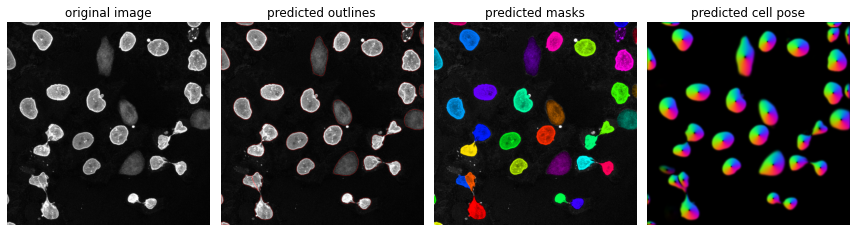

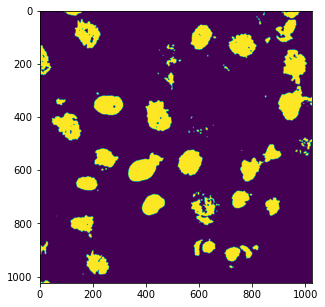

C:\Users\silvinm\AppData\Local\Temp/ipykernel_3036/789867399.py:93: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],


     Parent_label  Label  Mean_Intensity  Min_Intensity  Max_Intensity
66            0.0     67       17.000000             13             25
30            0.0     31       16.761905              9             29
73            0.0     74       15.315789              9             31
28            0.0     29       16.347826              6             31
27            0.0     28       17.894737             11             27
..            ...    ...             ...            ...            ...
93           30.0     94       95.590211             11            198
95           31.0     96       37.552668              6            137
100          32.0    101       49.002669              8            115
99           33.0    100       77.773223             13            169
103          34.0    104       60.441964             34            116

[104 rows x 5 columns]
20210728_HeLaK_dThy_ICRF_DAPI_53BP1-488_LAP2b-568_siCtrl_18_8_MIP


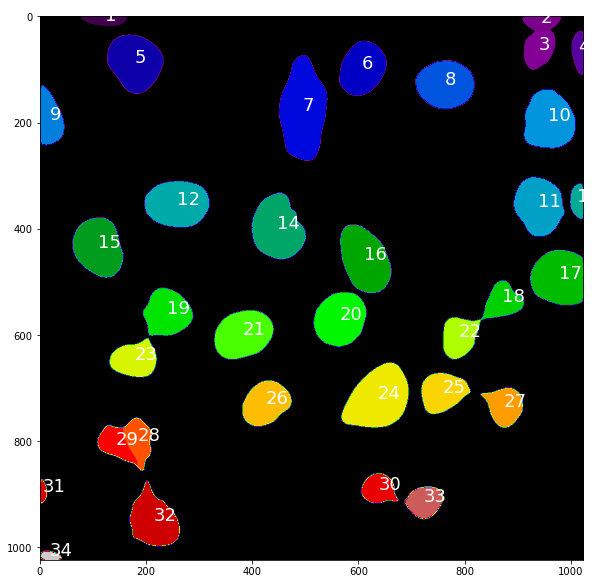

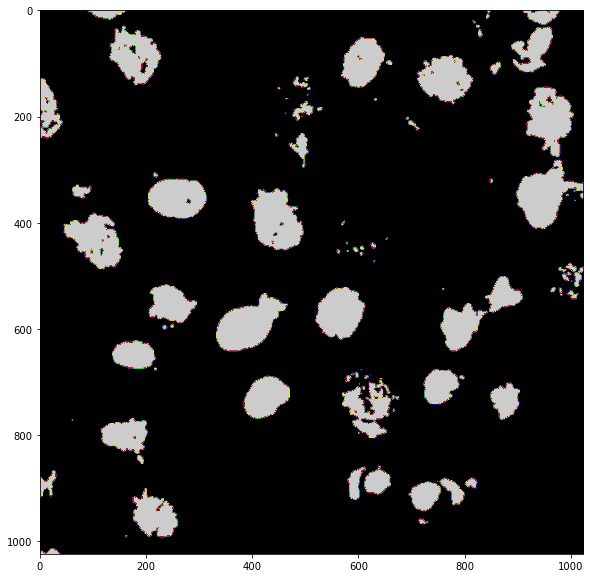

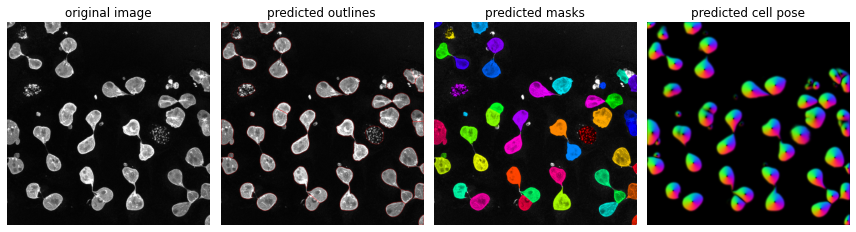

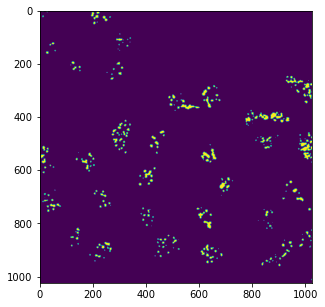

C:\Users\silvinm\AppData\Local\Temp/ipykernel_3036/789867399.py:93: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],


     Parent_label  Label  Mean_Intensity  Min_Intensity  Max_Intensity
41            0.0     42       43.000000             36             52
0             1.0      1      146.250000            113            177
1             1.0      2      131.437500             97            206
5             1.0      6      136.291667             97            165
2             2.0      3      105.084337             56            182
..            ...    ...             ...            ...            ...
310          44.0    311       96.428571             46            137
308          44.0    309       90.235294             60            124
299          44.0    300       96.664286             48            175
313          44.0    314       83.541667             50            135
322          45.0    323      103.428571             81            142

[323 rows x 5 columns]
20210728_HeLaK_dThy_ICRF_DAPI_53BP1-488_LAP2b-568_siCtrl_24_8_MIP


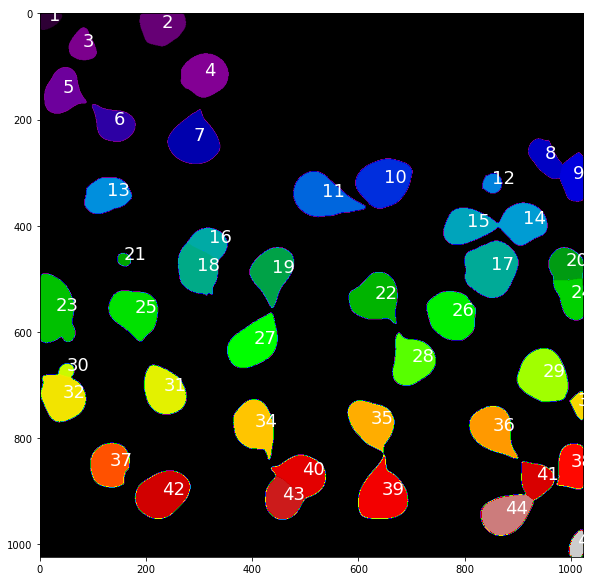

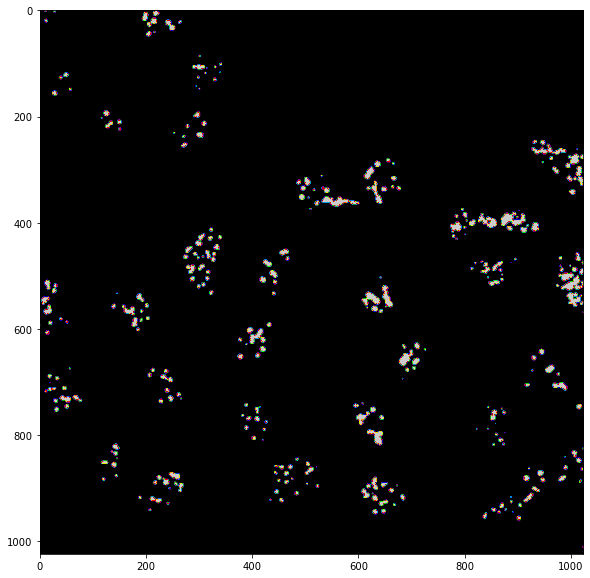

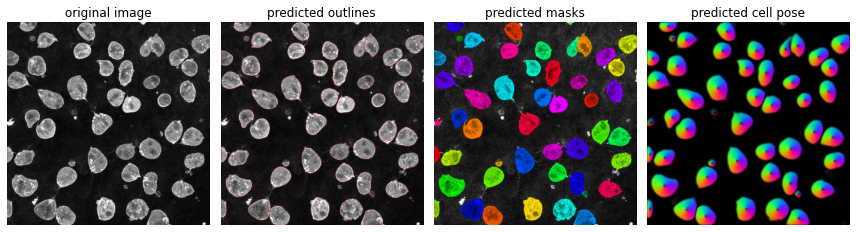

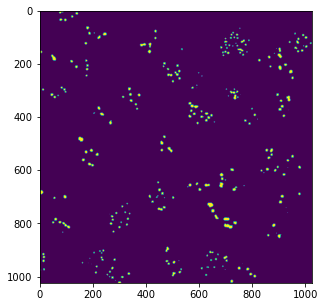

C:\Users\silvinm\AppData\Local\Temp/ipykernel_3036/789867399.py:93: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],


     Parent_label  Label  Mean_Intensity  Min_Intensity  Max_Intensity
198           0.0    199       77.000000             55             99
19            0.0     20       45.065217             21             88
2             1.0      3      128.220000             94            178
1             1.0      2       75.692308             42            110
0             1.0      1      132.871287             81            233
..            ...    ...             ...            ...            ...
268          49.0    269       75.773333             51            113
246          49.0    247       68.000000             68             68
253          49.0    254       67.290698             41            107
272          49.0    273       69.873563             47            113
255          49.0    256       72.505882             49            113

[275 rows x 5 columns]
20210728_HeLaK_dThy_ICRF_DAPI_53BP1-488_LAP2b-568_siCtrl_30_8_MIP


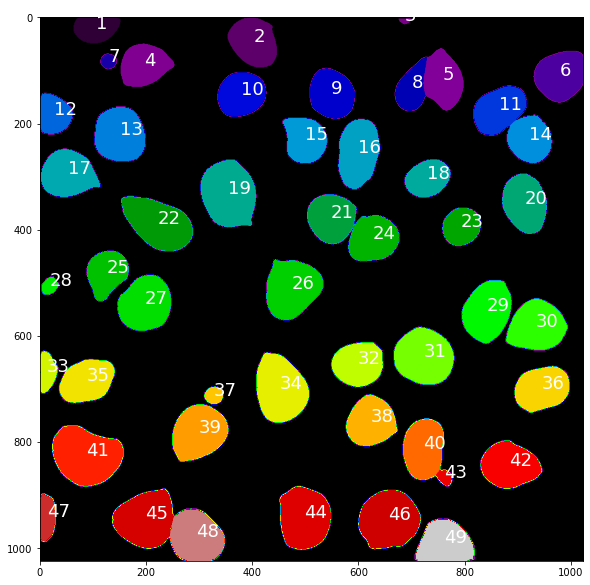

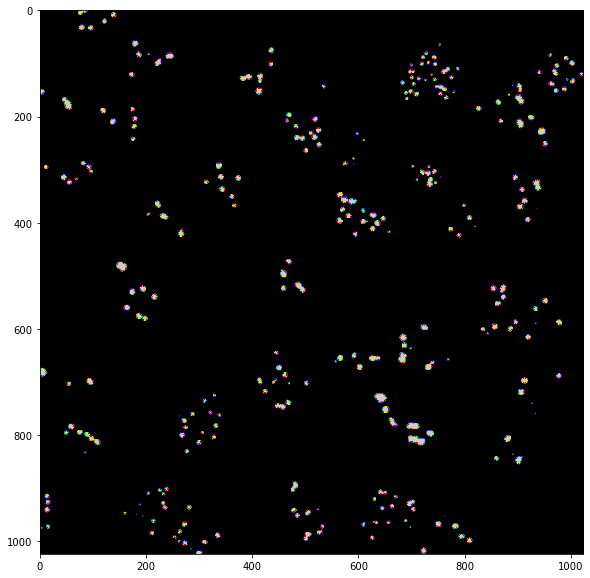

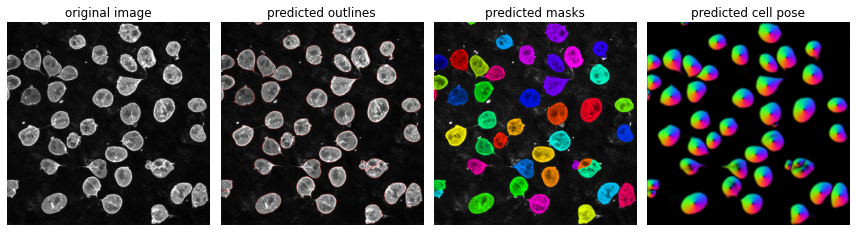

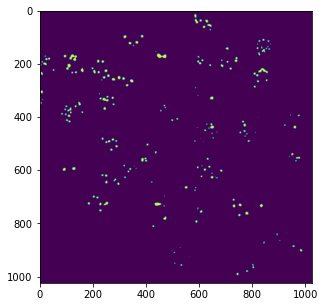

C:\Users\silvinm\AppData\Local\Temp/ipykernel_3036/789867399.py:93: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],


     Parent_label  Label  Mean_Intensity  Min_Intensity  Max_Intensity
166           0.0    167       23.294118             13             37
0             2.0      1       98.613636             50            153
1             2.0      2       98.919355             56            154
2             2.0      3      118.368421             69            153
3             2.0      4       97.436782             67            178
..            ...    ...             ...            ...            ...
200          42.0    201      115.133333             96            141
203          43.0    204       81.833333             55            111
206          43.0    207       81.973684             52            117
205          43.0    206       76.657143             52            121
207          43.0    208       85.156863             55            116

[208 rows x 5 columns]


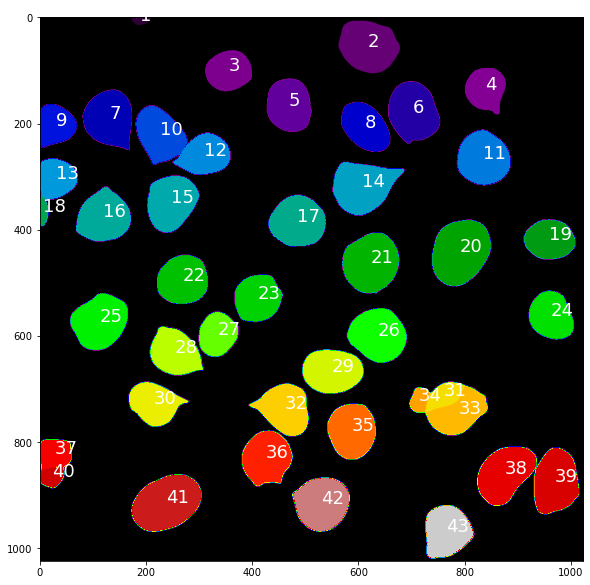

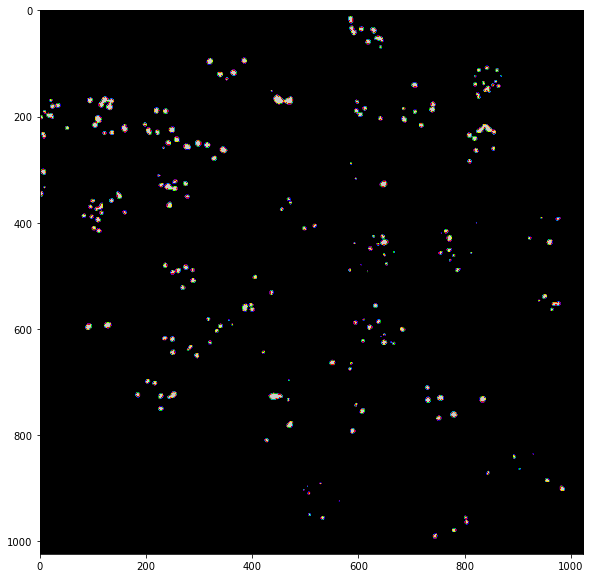

In [3]:
# =============================================================================
# Run Cellpose
# =============================================================================

model = models.Cellpose(gpu=False, model_type='cyto')


Impath = glob.glob(path+"/*.tif")
for img in Impath:
    image = io.imread(img)
    imagecv = skimage.io.imread(img)
    filename = os.path.basename(os.path.splitext(img)[0])
    print(filename)
    
    
    
    # =============================================================================
    # Verification de si il s'agit d'un stack ou d'une image 2D
    # ============================================================================= 
    imageS = image.shape
    if len(imageS) > 3:
        print("Je ne prends pas l'image " + filename +" car c'est un stack")
    else:
        channel1 = imagecv[:,:,0]
        channel2 = imagecv[:,:,1]
        channel3 = imagecv[:,:,2]
        
        
        
        # =============================================================================
        # Gaussian Blur et preparation à faire tourner cellpose
        # ============================================================================= 
        GB_imgs = filters.gaussian(channel3, 2)
       # define CHANNELS to run segementation on
       # grayscale=0, R=1, G=2, B=3
       # channels = [cytoplasm, nucleus]
       # if NUCLEUS channel does not exist, set the second channel to 0
        channels = [0,0]

        # if diameter is set to None, the size of the cells is estimated on a per image basis
        # you can set the average cell `diameter` in pixels yourself (recommended)
        # diameter can be a list or a single number for all images

        
        
        
        # =============================================================================
        # Detection des noyaux via cellpose
        # ============================================================================= 
        masks, flows, styles, diams = model.eval(GB_imgs, diameter=70, channels=channels)
    #     masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)


        fig = plt.figure(figsize=(12,5))
        plot.show_segmentation(fig, channel3, masks,flows[0],channels=channels)
        plt.tight_layout()
        plt.show()

   
    
        # =============================================================================
        # Seuillage des spots sur channel0 
        # ============================================================================= 
        blurred_image_spots = skimage.filters.gaussian(channel2, 2)
        thresh = threshold_yen(blurred_image_spots)
        binary_mask = blurred_image_spots > thresh
        
        fig = plt.figure(figsize=(12,5))
        plt.imshow(binary_mask)
        plt.show()
        
        
        
        # =============================================================================
        # Mise en relation des spots en fonction des noyaux
        # ============================================================================= 
        binary_mask_label = skimage.measure.label(binary_mask)
        properties=skimage.measure.regionprops_table(binary_mask_label, imagecv, properties= ['label','area', 'mean_intensity',
                                                                                            'min_intensity','max_intensity',
                                                                                            'equivalent_diameter','major_axis_length',
                                                                                            'minor_axis_length'])
        binary_ch=binary_mask_label>0
        corresponding_parents=masks*binary_ch
        
        properties_CorrespondingParent= skimage.measure.regionprops_table(binary_mask_label, masks, properties=['max_intensity'])
        
        
        
        # =============================================================================
        # Sortie en Dataframe des mesures d'intensités
        # ============================================================================= 
        prop = {}
        prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],
              'Max_Intensity': properties['max_intensity-0']
                } 
        
        df = pd.DataFrame(prop)
        df = DataFrame.sort_values(df, by = 'Parent_label')
        print(df)
#         save to csv
        df.to_csv(pathResult +"/" + filename + ".csv")
    
    
        
        # =============================================================================
        # Sauvegarde d'un png avec les noyaux labellisés
        # =============================================================================    
        fig, axs = plt.subplots(1, 1, figsize=(10,10))
        axs.imshow(masks, cmap='nipy_spectral')

        regionprops = skimage.measure.regionprops(masks)
        # Plot label number over each element (iterate over each element)
        for element in regionprops:
            # Get element centroid (x, y)
            element_centroid = (element.centroid[1], element.centroid[0])

            # Get element label and convert it to string
            element_label = str(element.label)

            # Plot label number at the coordinates of that element centroid
            axs.annotate(text = element_label, xy = element_centroid, fontsize = 18, color = 'white')

            fig.savefig(filename + "_labelednuclei.png")
            
        
        # =============================================================================
        # Sauvegarde d'un png avec les dots labellisés
        # =============================================================================    
        fig, axs = plt.subplots(1, 1, figsize=(10,10))
        axs.imshow(binary_mask, cmap='nipy_spectral')


#         regionprops_dots = skimage.measure.regionprops(binary_mask_label)
#         # Plot label number over each element (iterate over each element)
#         for element in regionprops_dots:
#             # Get element centroid (x, y)
#             element_centroid = (element.centroid[1], element.centroid[0])

#             # Get element label and convert it to string
#             element_label = str(element.label)

#             # Plot label number at the coordinates of that element centroid
# #             axs.annotate(text = element_label, xy = element_centroid, fontsize = 18, color = 'red')
#             axs.annotate(xy = element_centroid, fontsize = 18, color = 'red')
            
        fig.savefig(filename + "_labeledspots.png")
    
    

# =============================================================================
# Moving png and txt to a result folder
# =============================================================================    

# Move .png
pngpath = glob.glob(path+"/*.png")
for files in pngpath:
    shutil.move(files,pathResult)

    
# Move .txt
txtpath = glob.glob(path+"/*.txt")
for files in txtpath:
    shutil.move(files,pathResult)
